In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Project NLP/DisneylandReviews.csv', encoding='latin1') #encoding with latin1 beacause utf8 is not able to encode the data
df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


# Data Cleaning

In [ ]:
length= df['Review_Text'].str.len()

# Calculate the average length
average_length = length.mean()

print(f"Average number of characters in Review_Text: {average_length:.2f}")

Average number of characters in Review_Text: 696.82


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


There are no null values showed even though we can clearly see from the datadrame that there vlues listed as "missing" so we are going to check for null values first by looking at the unique values to see if they are represented in any other way other than "missing"

In [ ]:
df.Rating.unique()

array([4, 3, 5, 2, 1])

In [ ]:
df.Year_Month.unique()

array(['2019-4', '2019-5', '2019-3', '2018-9', '2019-1', '2018-11',
       '2018-12', '2018-6', '2019-2', '2018-10', '2018-8', '2018-5',
       '2018-4', '2018-7', '2018-3', '2018-2', 'missing', '2018-1',
       '2017-12', '2017-11', '2017-6', '2017-10', '2017-9', '2017-8',
       '2017-7', '2017-5', '2017-4', '2017-3', '2017-2', '2017-1',
       '2016-12', '2016-11', '2016-10', '2016-9', '2016-8', '2016-7',
       '2016-6', '2016-5', '2016-4', '2016-3', '2016-2', '2016-1',
       '2015-12', '2015-11', '2015-10', '2015-9', '2015-8', '2015-7',
       '2015-6', '2015-5', '2015-4', '2015-3', '2015-2', '2015-1',
       '2014-12', '2014-11', '2014-10', '2014-9', '2014-8', '2014-7',
       '2014-6', '2014-5', '2014-4', '2014-3', '2014-2', '2014-1',
       '2013-12', '2013-11', '2013-10', '2013-9', '2013-8', '2013-7',
       '2013-6', '2013-5', '2013-4', '2013-3', '2013-2', '2013-1',
       '2012-12', '2012-11', '2012-10', '2012-9', '2012-8', '2012-7',
       '2012-6', '2012-5', '2012-4', '20

In [ ]:
df.Reviewer_Location.unique()

array(['Australia', 'Philippines', 'United Arab Emirates',
       'United Kingdom', 'Singapore', 'India', 'Malaysia',
       'United States', 'Canada', 'Myanmar (Burma)', 'Hong Kong', 'China',
       'Indonesia', 'Qatar', 'New Zealand', 'Sri Lanka', 'Uganda',
       'Thailand', 'Austria', 'South Africa', 'Saudi Arabia', 'Japan',
       'Israel', 'South Korea', 'Turkey', 'Macau', 'Egypt', 'Mexico',
       'Mauritius', 'Sweden', 'Brazil', 'Kenya', 'Vietnam', 'Portugal',
       'Cambodia', 'Zambia', 'Croatia', 'France', 'Taiwan', 'Oman',
       'Colombia', 'Norway', 'Kuwait', 'Netherlands', 'Barbados',
       'Finland', 'Bosnia and Herzegovina', 'Brunei', 'Bahrain',
       'Maldives', 'Ireland', 'Russia', 'Romania',
       'Northern Mariana Islands', 'Germany', 'Chile', 'Isle of Man',
       'Pakistan', 'Ukraine', 'Greece', 'Switzerland', 'Spain', 'Estonia',
       "Côte d'Ivoire", 'Guam', 'Bangladesh', 'Belgium', 'Italy',
       'Botswana', 'Denmark', 'Argentina', 'Peru', 'Lithuania', 'I

In [ ]:
df.Branch.unique()

array(['Disneyland_HongKong', 'Disneyland_California', 'Disneyland_Paris'],
      dtype=object)

"missing" seems to be the only way to address null values furthermore we can notice that "Rating", "Branch" and "Review_Location" don't have any null value. So we are going to go ahead and count how many times the sting "missing" appears and interpret that as the amount of null values the rest of the columns

In [ ]:
(df.Review_ID=='missing').sum()

0

In [ ]:
(df.Year_Month=='missing').sum()

2613

In [ ]:
(df.Review_Text=='missing').sum()

0

"Year_Month" seems to be the only feature with missing values

In [ ]:
#Dropping the rows with null values
df = df[df['Year_Month'] != 'missing']
df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42113,92198076,4,2011-1,United Kingdom,Although our pick up was prompt the taxi drive...,Disneyland_Paris
42114,92061774,4,2011-1,Germany,Just returned from a 4 days family trip to Dis...,Disneyland_Paris
42115,91995748,1,2010-12,United Kingdom,We spent the 20 Dec 2010 in the Disney park an...,Disneyland_Paris
42116,91984642,2,2010-12,United Kingdom,Well I was really looking forward to this trip...,Disneyland_Paris


In [ ]:
#Checking for duplicates
df[df.duplicated(keep=False)]

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
7939,164862064,5,2013-6,Singapore,Great atmosphere... A place for everyone in th...,Disneyland_HongKong
7949,164862064,5,2013-6,Singapore,Great atmosphere... A place for everyone in th...,Disneyland_HongKong
8814,129231609,5,2012-4,United States,Let me just start off by saying that although ...,Disneyland_HongKong
8815,129214104,3,2012-4,Malaysia,Like: Back to the time with Disney characters....,Disneyland_HongKong
8816,129207323,5,2011-9,Australia,Having never been to any Disneyland I was thri...,Disneyland_HongKong
8823,129231609,5,2012-4,United States,Let me just start off by saying that although ...,Disneyland_HongKong
8824,129214104,3,2012-4,Malaysia,Like: Back to the time with Disney characters....,Disneyland_HongKong
8825,129207323,5,2011-9,Australia,Having never been to any Disneyland I was thri...,Disneyland_HongKong
9174,121586148,4,2011-5,Australia,Only a single day adventure. Not as good as d...,Disneyland_HongKong
9175,121580686,4,2011-3,United States,"Very small, they are expanding but at a slow p...",Disneyland_HongKong


The shown rows are all duplicates so we are going to delete them from the dataframe

In [ ]:
df=df.drop_duplicates()

In [ ]:
df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42113,92198076,4,2011-1,United Kingdom,Although our pick up was prompt the taxi drive...,Disneyland_Paris
42114,92061774,4,2011-1,Germany,Just returned from a 4 days family trip to Dis...,Disneyland_Paris
42115,91995748,1,2010-12,United Kingdom,We spent the 20 Dec 2010 in the Disney park an...,Disneyland_Paris
42116,91984642,2,2010-12,United Kingdom,Well I was really looking forward to this trip...,Disneyland_Paris


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40031 entries, 0 to 42117
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          40031 non-null  int64 
 1   Rating             40031 non-null  int64 
 2   Year_Month         40031 non-null  object
 3   Reviewer_Location  40031 non-null  object
 4   Review_Text        40031 non-null  object
 5   Branch             40031 non-null  object
dtypes: int64(2), object(4)
memory usage: 3.1+ MB


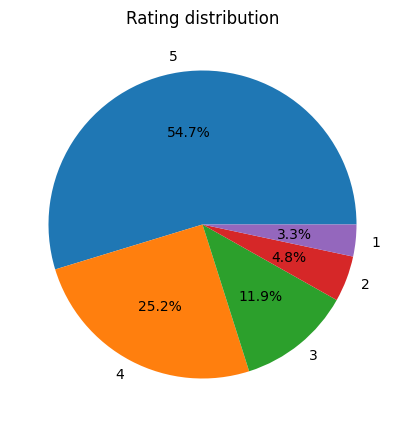

In [ ]:
rating_counts = df['Rating'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%')
plt.title('Rating distribution')
plt.show()

# Part 1


*   Text pre-processing(task-dependent):
  1. tokenization;
  2. lemmatization;
  3. additional pre-processing operations can be implemented.


*   Use of linguistic features(e.g. analyzing the data)

* Text representation:
  - choose suitable representations(s) and explain the rationable behind this choice.
    - Sparse representation (ppmi, tf-idf)
    - Dense word Embeddings(word2vec, Glove, fasttext, etc.)
    - Contextual Word Embeddings (Elmo, BERT, ...)
    - Large Language Models(LLMS)



# Text pre-processing

In [ ]:
df.Review_Text[0]

"If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides  its a Small World  is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy but the queues moved fairly well. "

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

from nltk.corpus import stopwords, words
nltk.download('stopwords')
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
df_copy=df.copy()

In [ ]:
#Tokenization
df_copy['processed_Text'] = df_copy['Review_Text'].apply(tokenizer.tokenize)
print(df_copy.processed_Text[0])

['If', 'you', 've', 'ever', 'been', 'to', 'Disneyland', 'anywhere', 'you', 'll', 'find', 'Disneyland', 'Hong', 'Kong', 'very', 'similar', 'in', 'the', 'layout', 'when', 'you', 'walk', 'into', 'main', 'street', 'It', 'has', 'a', 'very', 'familiar', 'feel', 'One', 'of', 'the', 'rides', 'its', 'a', 'Small', 'World', 'is', 'absolutely', 'fabulous', 'and', 'worth', 'doing', 'The', 'day', 'we', 'visited', 'was', 'fairly', 'hot', 'and', 'relatively', 'busy', 'but', 'the', 'queues', 'moved', 'fairly', 'well']


In [ ]:
#Case folding
df_copy['processed_Text'] = df_copy['processed_Text'].apply(lambda x: [word.lower() for word in x])
print(df_copy['processed_Text'][0])

['if', 'you', 've', 'ever', 'been', 'to', 'disneyland', 'anywhere', 'you', 'll', 'find', 'disneyland', 'hong', 'kong', 'very', 'similar', 'in', 'the', 'layout', 'when', 'you', 'walk', 'into', 'main', 'street', 'it', 'has', 'a', 'very', 'familiar', 'feel', 'one', 'of', 'the', 'rides', 'its', 'a', 'small', 'world', 'is', 'absolutely', 'fabulous', 'and', 'worth', 'doing', 'the', 'day', 'we', 'visited', 'was', 'fairly', 'hot', 'and', 'relatively', 'busy', 'but', 'the', 'queues', 'moved', 'fairly', 'well']


In [ ]:
print(df_copy['processed_Text'][1])

['its', 'been', 'a', 'while', 'since', 'd', 'last', 'time', 'we', 'visit', 'hk', 'disneyland', 'yet', 'this', 'time', 'we', 'only', 'stay', 'in', 'tomorrowland', 'aka', 'marvel', 'land', 'now', 'they', 'have', 'iron', 'man', 'experience', 'n', 'd', 'newly', 'open', 'ant', 'man', 'n', 'd', 'wasp', 'ironman', 'great', 'feature', 'n', 'so', 'exciting', 'especially', 'd', 'whole', 'scenery', 'of', 'hk', 'hk', 'central', 'area', 'to', 'kowloon', 'antman', 'changed', 'by', 'previous', 'buzz', 'lightyear', 'more', 'or', 'less', 'd', 'same', 'but', 'i', 'm', 'expecting', 'to', 'have', 'something', 'most', 'however', 'my', 'boys', 'like', 'it', 'space', 'mountain', 'turns', 'into', 'star', 'wars', 'this', '1', 'is', 'great', 'for', 'cast', 'members', 'staffs', 'felt', 'bit', 'minus', 'point', 'from', 'before', 'just', 'dun', 'feel', 'like', 'its', 'a', 'disney', 'brand', 'seems', 'more', 'local', 'like', 'ocean', 'park', 'or', 'even', 'worst', 'they', 'got', 'no', 'smiling', 'face', 'but', 'jus

In [ ]:
# Normalization function for tokenized words
def normalization(tokens):
    synonyms = {"hk": "hongkong", "hong kong": "hongkong", "n": "and", "u": "you", "d":"the"}
    normalized_tokens = [synonyms.get(token, token) for token in tokens]
    return normalized_tokens

df_copy['processed_Text'] = df_copy['processed_Text'].apply(normalization)

In [ ]:
print(df_copy['processed_Text'][0])

['ever', 'disneyland', 'anywher', 'find', 'disneyland', 'hong', 'kong', 'similar', 'layout', 'walk', 'main', 'street', 'familiar', 'feel', 'one', 'ride', 'small', 'world', 'absolut', 'fabul', 'worth', 'day', 'visit', 'fairli', 'hot', 'rel', 'busi', 'queue', 'move', 'fairli', 'well']


In [ ]:
#Stop words removal
stop_words = set(stopwords.words('english'))
df_copy['processed_Text'] = df_copy['processed_Text'].apply(lambda x: [word for word in x if word not in stop_words])
print(df_copy['processed_Text'][0])

['ever', 'disneyland', 'anywhere', 'find', 'disneyland', 'hong', 'kong', 'similar', 'layout', 'walk', 'main', 'street', 'familiar', 'feel', 'one', 'rides', 'small', 'world', 'absolutely', 'fabulous', 'worth', 'day', 'visited', 'fairly', 'hot', 'relatively', 'busy', 'queues', 'moved', 'fairly', 'well']


In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from nltk.stem import PorterStemmer

# Stemming function for tokenized words
def stem_tokens(tokens):
    stemmer = PorterStemmer()
    return [stemmer.stem(token) for token in tokens]

df_copy['processed_Text'] = df_copy['processed_Text'].apply(stem_tokens)
print(df_copy['processed_Text'][0])

['ever', 'disneyland', 'anywher', 'find', 'disneyland', 'hong', 'kong', 'similar', 'layout', 'walk', 'main', 'street', 'familiar', 'feel', 'one', 'ride', 'small', 'world', 'absolut', 'fabul', 'worth', 'day', 'visit', 'fairli', 'hot', 'rel', 'busi', 'queue', 'move', 'fairli', 'well']


Embeddings for training a W2V model with Gensim, and explore the most similar words.

In [ ]:
!pip install gensim
import gensim

In [ ]:
#training the word2vec model
model = gensim.models.Word2Vec(df_copy["processed_Text"], vector_size=100, window=5, min_count=2)

def get_sentence_embedding(tokens, model):
    embeddings = [model.wv[token] for token in tokens if token in model.wv]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(model.vector_size)

df_copy['sentence_embedding'] = df_copy['processed_Text'].apply(lambda tokens: get_sentence_embedding(tokens, model))

print(df_copy['sentence_embedding'][0])

[ 0.15036857  0.1982597   0.0350763  -0.39705995 -0.25949484  0.35504794
  0.27757162 -0.3542618  -0.43106145  0.05708807  0.12161858 -0.47815233
  0.03964802  0.42380726  0.01470433  0.39273468  0.02569821  0.05835145
 -0.38708946 -0.42662656  0.3610847  -0.81127596  0.39734685  0.1904496
 -0.27893788 -0.00414913  0.39707565  0.23936757  0.05884564 -0.50318944
  0.40817583  0.19715394 -0.26527348  0.25946128 -0.15984948 -0.4746672
  0.6083751   0.7665471   0.03077971  0.05009094 -0.21191852 -0.03698124
 -0.54368615 -0.643465    0.00345398 -0.10499799  0.49282405  0.16267644
  0.58490354  0.19115688 -0.13963524 -0.20926319  0.90082145  0.30409896
  0.74673074 -0.09750018 -0.09260774 -0.04234533  0.35342452  0.08376918
  0.07888053 -0.02423032  0.2584916  -0.33231777 -0.3737187   0.3552468
 -0.9098759  -0.19218987  0.48381463  0.12215353 -0.19157274 -0.12696525
 -0.80306673 -0.17112051 -0.34203413  0.24892227 -0.18000393  0.41391125
  0.11708332 -0.18517822  0.4066337  -0.5406238  -0.55

Read the word that will be used as a
vocabulary

# Part 2


*   "Core" task: **Text Classification**
*   Some available online resources:
  - https://pytorch.org/text/0.17.0/datasets.html#text-classification
  - https://huggingface.co/docs/datasets/en/index
  - https://www.kaggle.com/datasets?tags=13204-NLP
  - https://semeval.github.io/
  - https://www.ics.uci.edu/~smyth/courses/cs175/text_data_sets.html
  - https://paperswithcode.com/datasets?task=text-classification&mod=texts&lang=english&page=1
  - https://imerit.net/blog/17-best-text-classification-datasets-for-machine-learning-all-pbm/



* there is a hint on instruction


In [ ]:
df_copy

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,processed_Text,sentence_embedding
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,"[ever, disneyland, anywher, find, disneyland, ...","[0.15036857, 0.1982597, 0.0350763, -0.39705995..."
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,"[sinc, last, time, visit, hongkong, disneyland...","[-0.2470881, 0.20175081, -0.03431914, 0.119930..."
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,"[thank, god, hot, humid, visit, park, otherwis...","[0.06939135, 0.11557414, 0.14061359, -0.168320..."
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,"[hongkong, disneyland, great, compact, park, u...","[-0.21604018, -0.20506318, 0.109874114, -0.190..."
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,"[locat, citi, took, around, 1, hour, kowlon, k...","[0.35426813, 0.038418, -0.24621175, -0.2669199..."
...,...,...,...,...,...,...,...,...
42113,92198076,4,2011-1,United Kingdom,Although our pick up was prompt the taxi drive...,Disneyland_Paris,"[although, pick, prompt, taxi, driver, wasnt, ...","[0.17129423, -0.5108068, -0.19460757, 0.186945..."
42114,92061774,4,2011-1,Germany,Just returned from a 4 days family trip to Dis...,Disneyland_Paris,"[return, 4, day, famili, trip, disneyland, two...","[0.10356697, -0.39608607, -0.18429707, 0.12903..."
42115,91995748,1,2010-12,United Kingdom,We spent the 20 Dec 2010 in the Disney park an...,Disneyland_Paris,"[spent, 20, dec, 2010, disney, park, lunchtim,...","[0.05236831, -0.06001599, 0.09620197, -0.08752..."
42116,91984642,2,2010-12,United Kingdom,Well I was really looking forward to this trip...,Disneyland_Paris,"[well, realli, look, forward, trip, christma, ...","[-0.098870285, 0.10652652, 0.11646333, 0.03989..."


In [ ]:
def transform_rating(rating):
    if rating in [5, 4]:
        return 2 #positive
    elif rating == 3:
        return 1 #neutral
    elif rating in [1, 2]:
        return 0 #negative

df_copy['Sentiment'] = df_copy['Rating'].apply(transform_rating)
df_copy

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,processed_Text,sentence_embedding,Sentiment
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,"[ever, disneyland, anywher, find, disneyland, ...","[0.15036857, 0.1982597, 0.0350763, -0.39705995...",2
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,"[sinc, last, time, visit, hongkong, disneyland...","[-0.2470881, 0.20175081, -0.03431914, 0.119930...",2
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,"[thank, god, hot, humid, visit, park, otherwis...","[0.06939135, 0.11557414, 0.14061359, -0.168320...",2
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,"[hongkong, disneyland, great, compact, park, u...","[-0.21604018, -0.20506318, 0.109874114, -0.190...",2
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,"[locat, citi, took, around, 1, hour, kowlon, k...","[0.35426813, 0.038418, -0.24621175, -0.2669199...",2
...,...,...,...,...,...,...,...,...,...
42113,92198076,4,2011-1,United Kingdom,Although our pick up was prompt the taxi drive...,Disneyland_Paris,"[although, pick, prompt, taxi, driver, wasnt, ...","[0.17129423, -0.5108068, -0.19460757, 0.186945...",2
42114,92061774,4,2011-1,Germany,Just returned from a 4 days family trip to Dis...,Disneyland_Paris,"[return, 4, day, famili, trip, disneyland, two...","[0.10356697, -0.39608607, -0.18429707, 0.12903...",2
42115,91995748,1,2010-12,United Kingdom,We spent the 20 Dec 2010 in the Disney park an...,Disneyland_Paris,"[spent, 20, dec, 2010, disney, park, lunchtim,...","[0.05236831, -0.06001599, 0.09620197, -0.08752...",0
42116,91984642,2,2010-12,United Kingdom,Well I was really looking forward to this trip...,Disneyland_Paris,"[well, realli, look, forward, trip, christma, ...","[-0.098870285, 0.10652652, 0.11646333, 0.03989...",0


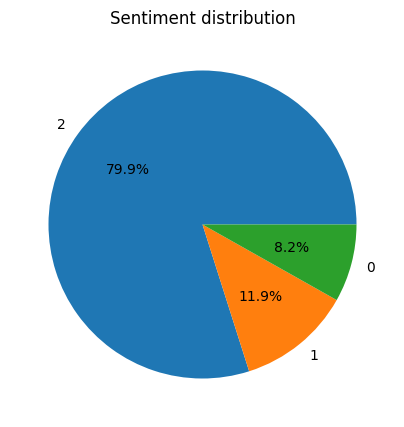

In [ ]:
rating_counts = df_copy['Sentiment'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%')
plt.title('Sentiment distribution')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization, GRU, Input
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
X, y = np.vstack(df_copy['sentence_embedding'].values), df_copy['Sentiment']

In [ ]:
y=y.astype(int)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

In [ ]:
num_train_samples, embedding_dim = X_train_scaled.shape
X_train_reshaped = X_train_scaled.reshape((num_train_samples, 1, embedding_dim))
num_test_samples, embedding_dim = X_test_scaled.shape
X_test_reshaped = X_test_scaled.reshape((num_test_samples, 1, embedding_dim))

In [ ]:
#add random seed for reproducibility
np.random.seed(30)
tf.random.set_seed(30)

model = Sequential()
model.add(Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(LSTM(32, return_sequences=False, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_reshaped, y_train_smote, epochs=10, batch_size=64, validation_data=(X_test_reshaped, y_test))

Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 31s 14ms/step - accuracy: 0.6236 - loss: 1.8311 - val_accuracy: 0.7176 - val_loss: 0.7149
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.6980 - loss: 0.7589 - val_accuracy: 0.7265 - val_loss: 0.6612
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6979 - loss: 0.7316 - val_accuracy: 0.7249 - val_loss: 0.6585
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6986 - loss: 0.7295 - val_accuracy: 0.7289 - val_loss: 0.6617
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7024 - loss: 0.7243 - val_accuracy: 0.7332 - val_loss: 0.6426
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7033 - loss: 0.7216 - val_accuracy: 0.7385 - val_loss: 0.6416
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7065 - loss: 0.7198 - val_accuracy: 0.7329 - val_loss: 0.6428
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7052 - loss: 0.7

Let's see if we can get a better performance with a bidirectional LSTM

In [ ]:
from keras.layers import Bidirectional

np.random.seed(30)
tf.random.set_seed(30)

model = Sequential()
model.add(Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.01))))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(32, return_sequences=False, kernel_regularizer=l2(0.01))))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(3, activaton='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_reshaped, y_train_smote, epochs=10, batch_size=64, validation_data=(X_test_reshaped, y_test))


Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.6370 - loss: 2.7805 - val_accuracy: 0.7221 - val_loss: 0.7343
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.6963 - loss: 0.7612 - val_accuracy: 0.7255 - val_loss: 0.6791
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.6957 - loss: 0.7415 - val_accuracy: 0.7217 - val_loss: 0.6863
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.6976 - loss: 0.7419 - val_accuracy: 0.7267 - val_loss: 0.6647
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.6966 - loss: 0.7369 - val_accuracy: 0.7250 - val_loss: 0.6665
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.6993 - loss: 0.7320 - val_accuracy: 0.7276 - val_loss: 0.6636
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.7044 - loss: 0.7263 - val_accuracy: 0.7349 - val_loss: 0.6396
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.7030 -

In [ ]:
print(df_copy.isnull().sum())  # Check for NaNs in each column


In [ ]:
!pip install keras-tuner

We chose to perform hyperparameter tuning of the unidiractional RNN with keras tuner

In [ ]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))

    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(LSTM(units=hp.Int(f'units_{i}', min_value=32, max_value=128, step=32),
                       return_sequences=True if i < hp.Int('num_layers', 1, 2) - 1 else False,
                       kernel_regularizer=l2(0.01)))
        model.add(BatchNormalization())
        model.add(Dropout(hp.Float('dropout_rate', 0.2, 0.5, step=0.1)))

    model.add(Dense(3, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=5, directory='my_dir', project_name='my_project')
tuner.search(X_train_reshaped, y_train_smote, epochs=10, validation_data=(X_test_reshaped, y_test))

#best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)

# Train the model with the best hyperparameters
history = model.fit(X_train_reshaped, y_train_smote, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))


# Sentiment Analysis

In [ ]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
from PIL import Image

!pip install pillow

In [ ]:
df_copy

In [ ]:
df_copy.info()

In [ ]:
from wordcloud import WordCloud

In [ ]:
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

df_positive=df_copy[df_copy['Sentiment']==2]
df_neutral=df_copy[df_copy['Sentiment']==1]
df_negative=df_copy[df_copy['Sentiment']==0]

In [ ]:
generate_word_cloud(' '.join(df['Review_Text']), 'Overall Reviews')

In [ ]:
generate_word_cloud(' '.join(df_positive['Review_Text']), 'Positive Reviews')

In [ ]:
generate_word_cloud(' '.join(df_neutral['Review_Text']), 'Neutral Reviews')

In [ ]:
generate_word_cloud(' '.join(df_negative['Review_Text']), 'Negative Reviews')